<a href="https://colab.research.google.com/github/catastropiyush/RAG-dataset-gen/blob/main/RAG_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain langchain_pinecone langchain[docarray] docarray llama_index llama-index-readers-github llama-index-embeddings-langchain llama-index-llms-ollama sentence-transformers langchain-community langchain-huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of langchain-community to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.1/417.1 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.3/427.3 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8

In [3]:
#Restart the session after running this cell
!pip install pandas==2.0.3 numpy==1.25.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 99.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-community 0.3.19 requires numpy<3,>=1.26.2, but you have numpy 1.25.2 which is incompatible.
langchain-tests 0.3.15 requires numpy<3,>=1.26.2, but you have numpy 1.25.2 which is incompatible.
langchain-pinecone 0.2.3 requires numpy<2.0.0,>=1.26.4, but you have numpy 1.25.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have 

In [2]:
#open the terminal
!pip install colab-xterm
%load_ext colabxterm
%xterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 3.7 MB/s eta 0:00:00


Launching Xterm...

<IPython.core.display.Javascript object>

In [1]:
# Import necessary libraries
import pandas as pd
import nest_asyncio
from llama_index.core import Document, VectorStoreIndex, Settings
from llama_index.embeddings.langchain import LangchainEmbedding
#from langchain.embeddings import HuggingFaceEmbeddings
from langchain_huggingface import HuggingFaceEmbeddings
from llama_index.llms.ollama import Ollama
from llama_index.core import Document
from llama_index.core.node_parser import TokenTextSplitter

In [3]:
#select LLM
MODEL = "llama3" # https://ollama.com/library/llama3

In [ ]:
#take a hugging face token from your hugging face account
https://huggingface.co/    # go here make an account
#go to access tokens and create a new token

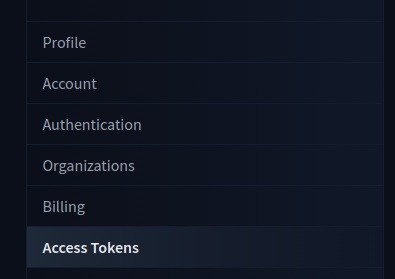

In [ ]:
#put that access token in google colab secrets like this

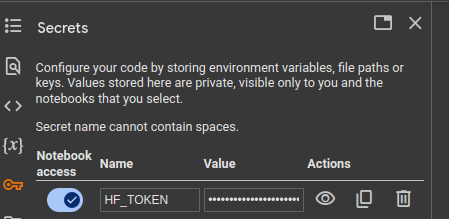

In [4]:
nest_asyncio.apply()
# Set up the embedding model
embeddings = HuggingFaceEmbeddings(model_name='BAAI/bge-base-en-v1.5')
#click on grant access when it asks for the HF_TOKEN
embed_model = LangchainEmbedding(embeddings)
Settings.embed_model = embed_model

llm = Ollama(model="llama3",base_url="http://localhost:11434")
#llm = Ollama(model="gemma2",base_url="http://localhost:11434")
Settings.llm = llm

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
import pandas as pd
selected_df = pd.read_csv("selected_df.xls")

In [6]:
df1=selected_df.sample(50)

In [7]:
df1.head(5)

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
243,J,"Yu, H; Cheng, Y; Fu, YK; Zhang, L; Guo, SY; Li...",NaN,NaN,NaN,"Yu, Han; Cheng, Ying; Fu, Yaokun; Zhang, Lu; G...",NaN,NaN,Remarkable hydrogen properties of MgH2 via com...,INTERNATIONAL JOURNAL OF HYDROGEN ENERGY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000862677500001,0
205,J,"Anagnostou, NG; Makridis, SS; Kikkinides, ES; ...",NaN,NaN,NaN,"Anagnostou, N. G.; Makridis, S. S.; Kikkinides...",NaN,NaN,Synthesis and Characterization of TiFe0.7-xMn0...,JOURNAL OF NANOSCIENCE AND NANOTECHNOLOGY,...,NaN,NaN,NaN,23447959.0,NaN,NaN,NaN,NaN,WOS:000315172400032,0
181,J,"Edalati, K; Emami, H; Ikeda, Y; Iwaoka, H; Tan...",NaN,NaN,NaN,"Edalati, Kaveh; Emami, Hoda; Ikeda, Yuji; Iwao...",NaN,NaN,New nanostructured phases with reversible hydr...,ACTA MATERIALIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000374072700028,0
207,J,"Wu, GF; Wang, JL; Zhang, XY; Zhu, LY",NaN,NaN,NaN,"Wu, Guangfen; Wang, Jinlan; Zhang, Xiuyun; Zhu...",NaN,NaN,Hydrogen Storage on Metal-Coated B80 Buckyball...,JOURNAL OF PHYSICAL CHEMISTRY C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000265529700027,0
236,J,"Huang, X; Xiao, XZ; Wang, XC; Yao, ZD; Wang, C...",NaN,NaN,NaN,"Huang, Xu; Xiao, Xuezhang; Wang, Xuancheng; Ya...",NaN,NaN,Highly synergetic catalytic mechanism of Ni@g-...,ENERGY STORAGE MATERIALS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000436924800023,0


In [8]:
#create chunks from a document with overlap
def chunk_document_with_overlap(text, chunk_size, overlap_size):
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunks.append(text[start:end])
        start += chunk_size - overlap_size
    return chunks

#create documents from column and chunk them
def create_documents(df, column_name, chunk_size, overlap_size):
    documents = []
    for idx, row in df.iterrows():
        content = row[column_name]
        chunks = chunk_document_with_overlap(content, chunk_size, overlap_size)
        for i, chunk in enumerate(chunks):
            doc = Document(text=chunk, doc_id=f"doc_{idx}_chunk_{i}")
            documents.append(doc)
    return documents

chunk_size   = 256  # chunk size
overlap_size = 30   # overlap size
docs          = create_documents(df1, 'Abstract', chunk_size, overlap_size)


results = []  # List to store the results
# Group documents by abstract index
grouped_docs = df1.index.to_series().apply(lambda idx: [doc for doc in docs if doc.doc_id.startswith(f"doc_{idx}")])

for idx, abstract_docs in grouped_docs.items():
    index = VectorStoreIndex.from_documents(abstract_docs)
    query_engine = index.as_query_engine(streaming=False, similarity_top_k=3)
    #Define query
    query = """
      Describe all the parameters of the material discussed in the text.
      If no information is available just write "N/A".
      The output should be concise and in the format as below:

      Name of Alloy                        :
      Hydrogen storage capacity            :
      Temperature                          :
      Pressure                             :
      Experimental Conditions              :
    """

    response = query_engine.query(query)

    results.append({
        'abstract_id': f"doc_{idx}",
        'abstract': df1.loc[idx, 'Abstract'],
        'extracted_info': str(response)
    })

results_df = pd.DataFrame(results)

In [9]:
import re

def extract_info(text):
    name_match = re.search(r"Name of Alloy\s*:\s*(.*)", text)
    capacity_match = re.search(r"Hydrogen storage capacity\s*:\s*(.*)", text)
    temperature_match = re.search(r"Temperature\s*:\s*(.*)", text)
    pressure_match = re.search(r"Pressure\s*:\s*(.*)", text)
    conditions_match = re.search(r"Experimental Conditions\s*:\s*(.*)", text)

    return {
        "Name of Alloy": name_match.group(1).strip() if name_match else None,
        "Hydrogen storage capacity": capacity_match.group(1).strip() if capacity_match else None,
        "Temperature": temperature_match.group(1).strip() if temperature_match else None,
        "Pressure": pressure_match.group(1).strip() if pressure_match else None,
        "Experimental Conditions": conditions_match.group(1).strip() if conditions_match else None
    }

# Apply the extraction function to the 'extracted_info' column
extracted_data = results_df['extracted_info'].apply(extract_info)

# Convert the extracted data to a DataFrame
extracted_df = pd.DataFrame(extracted_data.tolist())

# Concatenate the original DataFrame with the extracted DataFrame
result_df = pd.concat([results_df, extracted_df], axis=1)
result_df

,abstract_id,abstract,extracted_info,Name of Alloy,Hydrogen storage capacity,Temperature,Pressure,Experimental Conditions
0,doc_243,Carbon-based materials have been proposed as a...,Here is the answer:\n\nName of Alloy ...,MgH2-CPF composite,5.67 wt% H2 (at 623 K) and 5.62 wt% H2 (at 423 K),"651 K, 623 K, and 423 K",N/A,under the same condition
1,doc_205,Metal hydrides (MH) are often preferred to abs...,Here is the answer:\n\nName of Alloy:\nTiFe0.7...,"TiFe0.7-xMn0.3Vx (x = 0.05, and 0.1), Ti1-yTay...",N/A,Ambient temperature,Ambient pressure,Synthesis
2,doc_181,Mg and Zr are immiscible in the solid and liqu...,Here is the answer:\n\nName of Alloy ...,Mg-Zr,None,Room temperature,9 MPa,"Absorption under pressure, desorption in air"
3,doc_207,We investigate the feasibility of bare and met...,Here's the answer in the required format:\n\nN...,"M = Ca, Sc; B-80 with Li, Na, K, Be, Mg",None,N/A,N/A,Density functional theory approach
4,doc_236,Li-Mg-B-H system with the composition of 2LiBH...,Here is the answer in the requested format:\n\...,Li-Mg-B-H,11.5 wt%,"Similar to 105 degrees C, 200 +/- 6 kJ/mol, 12...",N/A,N/A
5,doc_17,"The dehydriding of sodium aluminum hydride, Na...",Here's the answer based on the provided contex...,Al-3-Li2Mg(NH)(2) doped with TiCl3,6.2 wt %,300 degrees C,172 bar,"Not mentioned for this specific alloy, but gen..."
6,doc_248,The feasibility of scaling up the production o...,Here's the answer based on the provided contex...,Zr-Ni alloy,5.3-5.6 wt%,about 300 degrees C,N/A,treated in an attritor-type ball mill
7,doc_99,For hydrogen storage applications a nanocrysta...,Here is the answer based on the provided conte...,"Mg90Ni8RE2 (RE = Y, Nd, Gd)",N/A,50 - 385 degrees C,up to 30 bar H-2,Thermogravimetry
8,doc_197,An experimental set up for measuring Effective...,Here is the answer:\n\nLa0.8Ce0.2Ni5 alloy pow...,La0.8Ce0.2Ni5,N/A,p-d temperature (no specific value mentioned),Argon and hydrogen pressures (no specific valu...,N/A
9,doc_125,Transition metal catalysts are particularly ef...,Here's the answer based on the provided contex...,MgH2+10 wt% nano-ZrO2,5.9 wt%,* 163 ° after one activation,N/A,* Activation (no specific pressure mentioned)
